In [1]:
# !pip install xmltodict

In [5]:
import torch
from torch.utils.data import Dataset
import PIL
from PIL import Image

from pathlib import Path

import numpy as np
import pandas as pd
from facelive.data.landmark import IBug300WDataset
import xmltodict

In [56]:
class IBugDLib300WDataset(Dataset):
    def __init__(self, root, train=True, transforms=None, 
            train_xml_file = 'labels_ibug_300W_train.xml',
            test_xml_file = 'labels_ibug_300W_test.xml',
        ):
        self.root = root
        self.train = train
        self.xml_train_file = Path(root).joinpath(train_xml_file)
        self.xml_valid_file = Path(root).joinpath(test_xml_file)
        self.transforms = transforms
        # self.dframe = self._dframe()
        self.xmldata = self._xmldata()
        
    def _load_image(self, path, to_grayscale=False):
        img = Image.open(path)
        if to_grayscale:
            img = img.convert('L')
        return img
    
    def _load_xml_to_dict(self, path):
        with open(path, 'r', encoding='utf-8') as file:
            xmldata = file.read()
        xml2dict = xmltodict.parse(xmldata)
        
        return xml2dict
    
    def _xmldata(self):
        fpath = self.xml_train_file
        if not self.train:
            fpath = self.xml_valid_file
        
        gdata = self._load_xml_to_dict(str(fpath))
        xmldata = gdata['dataset']['images']['image']
        return xmldata
    
    def _image_path(self, data):
        return Path(self.root).joinpath(data["@file"])
    
    def _get_size(self, data):
        w, h = data["@width"], data["@height"]
        return w,h
    
    def _get_box(self, data):
        top = data["box"]["@top"]
        left = data["box"]["@left"]
        width = data["box"]["@width"]
        height = data["box"]["@height"]
        return top, left, width, height
    
    def _get_points(self, data):
        parts = data["box"]["part"]
        points = []
        for p in parts:
            n,x,y = p["@name"], float(p["@x"]), float(p["@y"])
            points.append((x,y))
            
        return np.array(points)
    
    def __len__(self):
        return len(self.xmldata)
    
    def __getitem__(self, idx):
        data = self.xmldata[idx]
        # print(data)
        
        impath = self._image_path(data)
        impath = str(Path(self.root).joinpath(impath))
        
        image = self._load_image(impath)
        points = self._get_points(data)
        
        if self.transforms:
            image, points = self.transforms(image, transforms)
        
        return image, points
        
        
    

In [57]:
root = '/data/vision/landmark/ibug_300W_dlib/'
dset = IBugDLib300WDataset(root)
# img, pts = dset[0]
# pts[0:10]

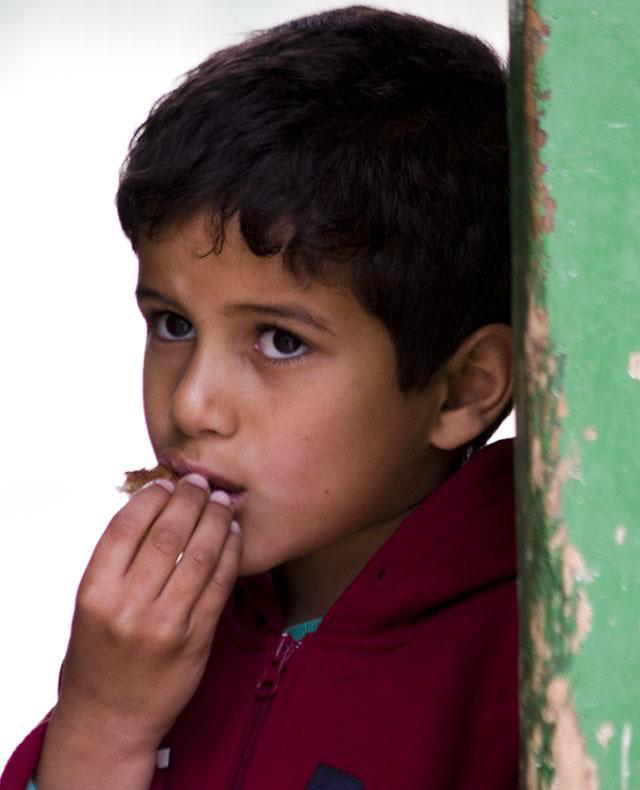

In [58]:
image, points = dset[0]

In [40]:
images

array([[145., 355.],
       [144., 382.],
       [145., 407.],
       [149., 433.],
       [158., 458.],
       [168., 503.],
       [181., 531.],
       [190., 565.],
       [217., 576.],
       [254., 574.],
       [305., 553.],
       [353., 531.],
       [395., 504.],
       [414., 466.],
       [424., 424.],
       [431., 390.],
       [439., 359.],
       [136., 296.],
       [143., 287.],
       [152., 285.],
       [163., 288.],
       [174., 296.],
       [219., 311.],
       [250., 304.],
       [283., 305.],
       [316., 316.],
       [341., 335.],
       [204., 345.],
       [197., 367.],
       [189., 387.],
       [182., 410.],
       [171., 422.],
       [181., 434.],
       [195., 441.],
       [208., 440.],
       [221., 440.],
       [156., 331.],
       [168., 312.],
       [185., 320.],
       [198., 337.],
       [182., 341.],
       [163., 339.],
       [257., 347.],
       [271., 330.],
       [292., 335.],
       [312., 349.],
       [292., 358.],
       [269.,

In [35]:
images[0]
# images[0]['@box']
images[0]

{'@file': 'lfpw/trainset/image_0457.png',
 '@width': '350',
 '@height': '464',
 'box': {'@top': '78',
  '@left': '74',
  '@width': '138',
  '@height': '140',
  'part': [{'@name': '00', '@x': '55', '@y': '141'},
   {'@name': '01', '@x': '59', '@y': '161'},
   {'@name': '02', '@x': '66', '@y': '182'},
   {'@name': '03', '@x': '75', '@y': '197'},
   {'@name': '04', '@x': '90', '@y': '209'},
   {'@name': '05', '@x': '108', '@y': '220'},
   {'@name': '06', '@x': '131', '@y': '226'},
   {'@name': '07', '@x': '149', '@y': '232'},
   {'@name': '08', '@x': '167', '@y': '230'},
   {'@name': '09', '@x': '181', '@y': '225'},
   {'@name': '10', '@x': '184', '@y': '208'},
   {'@name': '11', '@x': '186', '@y': '193'},
   {'@name': '12', '@x': '185', '@y': '179'},
   {'@name': '13', '@x': '184', '@y': '167'},
   {'@name': '14', '@x': '186', '@y': '152'},
   {'@name': '15', '@x': '185', '@y': '142'},
   {'@name': '16', '@x': '181', '@y': '133'},
   {'@name': '17', '@x': '95', '@y': '128'},
   {'@name':

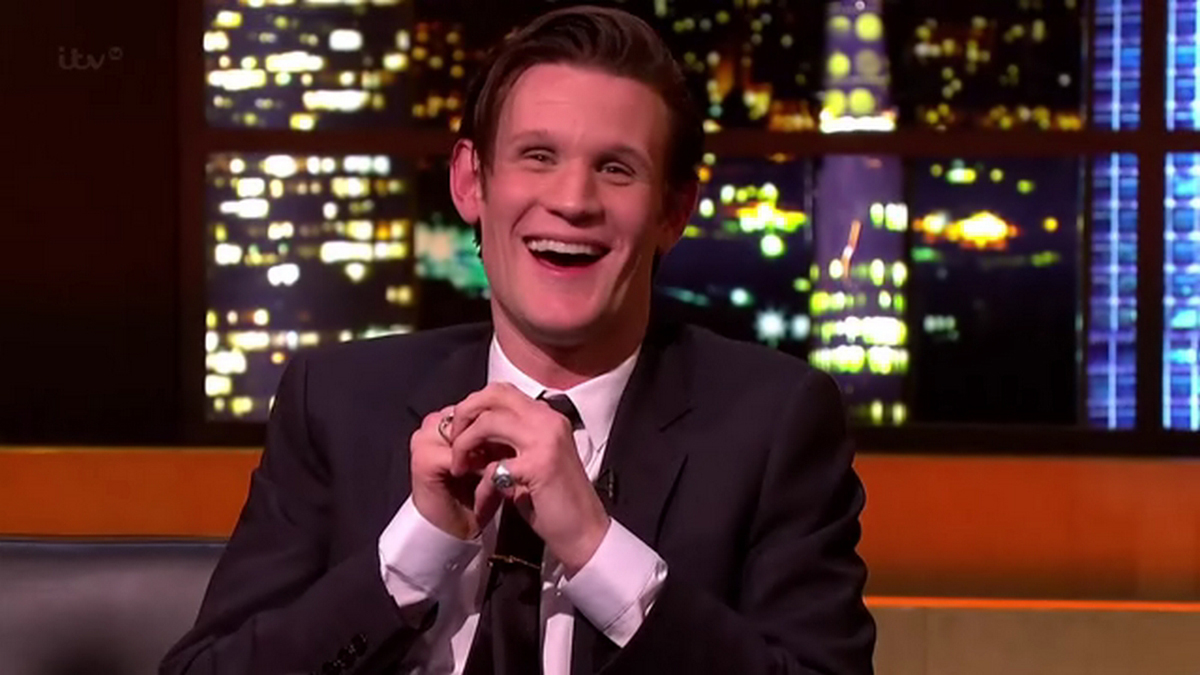

In [4]:
img

In [18]:
root = '/data/vision/landmark/300W/'
indoor_path = Path(root).joinpath('01_Indoor')
outdoor_path = Path(root).joinpath('02_Outdoor')

In [25]:
indoor_pts_files = list(indoor_path.glob('*.pts'))
indoor_img_files = list(indoor_path.glob('*.png'))

indoor_img_files.sort()
indoor_pts_files.sort()

True

In [40]:
import json
'a'.startswith('')

SyntaxError: invalid syntax (2791346023.py, line 2)

In [38]:
pts_path  = str(indoor_pts_files[0])
with open(pts_path, 'r') as f:
    data = f.readlines()

array([[446.   ,  91.   ],
       [449.459, 119.344],
       [450.957, 150.614],
       [460.552, 176.986],
       [471.486, 202.157],
       [488.087, 226.842],
       [506.016, 246.438],
       [524.662, 263.865],
       [553.315, 271.435],
       [578.732, 266.26 ],
       [599.361, 248.966],
       [615.947, 220.651],
       [627.439, 197.999],
       [635.375, 179.064],
       [642.063, 156.371],
       [647.302, 124.753],
       [646.518,  92.944],
       [470.271, 117.87 ],
       [486.218, 109.415],
       [503.097, 114.454],
       [519.714, 120.09 ],
       [533.68 , 127.609],
       [571.937, 123.59 ],
       [585.702, 117.155],
       [602.344, 109.07 ],
       [620.077, 103.951],
       [633.964, 111.236],
       [554.931, 145.072],
       [554.589, 161.106],
       [554.658, 177.57 ],
       [554.777, 194.295],
       [532.717, 197.93 ],
       [543.637, 202.841],
       [555.652, 205.483],
       [565.441, 202.069],
       [576.368, 197.061],
       [487.474, 136.436],
 